In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 全局设置字体大小
plt.rcParams.update({"font.size": 14})  # 设置全局字体大小为12

In [3]:
# 创建更新后的数据
# data = {
#     "Model": [
#         "Linear Regression",
#         "Ridge Regression",
#         "Gaussian Process",
#         "SVM",
#         "k-NN",
#         "Random Forest",
#         "Deep neural network",
#         "Deep generative transfer\n(Our work)",
#     ],
#     "Pouch31_MAPE_1": [100.72, 7.13, 62.21, 6.64, 8.23, 9.00, 10.51, 3.6],  # 1/50
#     "Pouch52_MAPE_1": [62.23, 15.95, 37.78, 17.94, 17.03, 16.49, 10.31, 7.2],
#     "Pouch31_rho_1": [0.19, 0.17, 0.002, 0.11, 0.05, -0.02, 0.07, 0.73],
#     "Pouch52_rho_1": [0.01, 0.72, -0.104, 0.55, 0.34, 0.33, 0.69, 0.84],
#     "Pouch31_MAPE_2": [100.5, 6.69, 25.98, 6.31, 7.53, 7.64, 9.33, 3.7],  # 1/40
#     "Pouch52_MAPE_2": [66.35, 15.85, 19.03, 17.98, 17.45, 17.22, 11.54, 8.1],
#     "Pouch31_rho_2": [0.19, 0.14, 0.181, 0.10, 0.10, 0.10, 0.34, 0.70],
#     "Pouch52_rho_2": [-0.04, 0.71, 0.594, 0.55, 0.28, 0.26, 0.70, 0.82],
#     "Pouch31_MAPE_3": [63.66, 6.99, 18.91, 6.03, 7.74, 7.43, 6.22, 3.7],  # 1/30
#     "Pouch52_MAPE_3": [67.76, 17.47, 24.21, 18.08, 17.50, 17.20, 11.82, 6.0],
#     "Pouch31_rho_3": [0.08, 0.14, 0.154, 0.17, 0.05, 0.15, 0.51, 0.75],
#     "Pouch52_rho_3": [-0.03, 0.63, 0.424, 0.57, 0.21, 0.24, 0.69, 0.88],
#     "Pouch31_MAPE_4": [48.46, 7.61, 28.46, 6.10, 7.71, 8.00, 5.15, 2.8],  # 1/20
#     "Pouch52_MAPE_4": [86.03, 16.96, 22.92, 17.64, 17.14, 16.26, 9.64, 5.9],
#     "Pouch31_rho_4": [0.13, 0.17, 0.096, 0.19, 0.01, 0.08, 0.64, 0.85],
#     "Pouch52_rho_4": [0.02, 0.65, 0.392, 0.67, 0.25, 0.34, 0.74, 0.89],
# }

# 将数据转换为DataFrame
# df = pd.DataFrame(data)

In [4]:
# 从CSV文件中读取数据
df = pd.read_csv("../data/results/benchmark.csv")

# 打印读取的数据
print(df)

                                  Model  Pouch31_MAPE_1  Pouch52_MAPE_1  \
0                     Linear Regression          100.72           62.23   
1                      Ridge Regression            7.13           15.95   
2                      Gaussian Process           62.21           37.78   
3                                   SVM            6.64           17.94   
4                                  k-NN            8.23           17.03   
5                         Random Forest            9.00           16.49   
6                   Deep neural network           10.51           10.31   
7  Deep generative transfer\n(Our work)            3.60            7.20   

   Pouch31_rho_1  Pouch52_rho_1  Pouch31_MAPE_2  Pouch52_MAPE_2  \
0          0.190          0.010          100.50           66.35   
1          0.170          0.720            6.69           15.85   
2          0.002         -0.104           25.98           19.03   
3          0.110          0.550            6.31         

In [5]:
# 更新 domain_labels
domain_labels = ["1/50 (42)", "1/40 (52)", "1/30 (70)", "1/20 (105)"]

# 不同模型使用不同的标记符号
markers = [
    "o",
    "s",
    "D",
    "^",
    "v",
    "x",
    "p",
    "+",
]  # 删除DNN的五角星标记，改为'p'，让五角星留给Our work

In [6]:
# 生成折线图并突出 "Our work" (五角星标记，红色线条)
def plot_2by2_line_chart_log_scale():
    # 创建 2x2 的子图网格，设置图形大小
    fig, axs = plt.subplots(2, 2, figsize=(14, 12), sharex=False)

    # 定义 x 轴的值，表示不同的数据可用性
    x = np.arange(len(domain_labels))

    # 定义要绘制的指标列表
    metrics = ["Pouch31_MAPE", "Pouch52_MAPE", "Pouch31_rho", "Pouch52_rho"]

    # 遍历每个指标，绘制对应的折线图
    for idx, metric in enumerate(metrics):
        # 计算当前子图的位置
        row, col = divmod(idx, 2)
        ax = axs[row, col]  # 获取当前子图的句柄

        # 遍历每个模型，绘制折线图
        for i, model in enumerate(df["Model"]):
            # 获取当前模型在当前指标下的所有值
            y_values = df[df["Model"] == model][
                [f"{metric}_1", f"{metric}_2", f"{metric}_3", f"{metric}_4"]
            ].values.flatten()

            # 如果是 "Our work"，使用红色实线和五角星标记突出显示
            if model == "Deep generative transfer\n(Our work)":
                ax.plot(
                    x,
                    y_values,
                    linestyle="-",
                    marker="*",
                    label=model,
                    linewidth=2,
                    color="red",
                )
            else:
                # 其他模型使用虚线和其他标记
                ax.plot(
                    x,
                    y_values,
                    linestyle="--",
                    marker=markers[i],
                    label=model,
                    linewidth=1,
                )

        # 设置 x 轴的刻度和标签
        ax.set_xticks(x)
        ax.set_xticklabels(domain_labels, rotation=0)

        # 如果当前指标是 MAPE，使用对数刻度
        if "MAPE" in metric:
            ax.set_yscale("log")
            ax.set_ylim(1, 150)
            ax.set_ylabel("Mean absolute percentage error [%]")
        else:
            # 如果是 Pearson 相关系数，使用线性刻度
            ax.set_ylim(-0.2, 1)
            ax.set_ylabel("Pearson correlation [-]")

        # 设置 x 轴标签
        ax.set_xlabel("Field data availability [-]")

    # 获取图例的句柄和标签
    handles, labels = axs[0, 0].get_legend_handles_labels()

    # 添加图例，放置在图形右侧中部
    fig.legend(
        handles,
        labels,
        loc="center left",
        bbox_to_anchor=(0.78, 0.5),
        ncol=1,
        frameon=False,
        fontsize=12,
    )

    # 调整子图之间的间距
    plt.subplots_adjust(
        left=0.1, right=0.75, top=0.9, bottom=0.1, wspace=0.3, hspace=0.3
    )

    # 保存图形为高分辨率图片
    plt.savefig("../figures/benchmarking.jpg", dpi=300)

    # 显示图形
    plt.show()

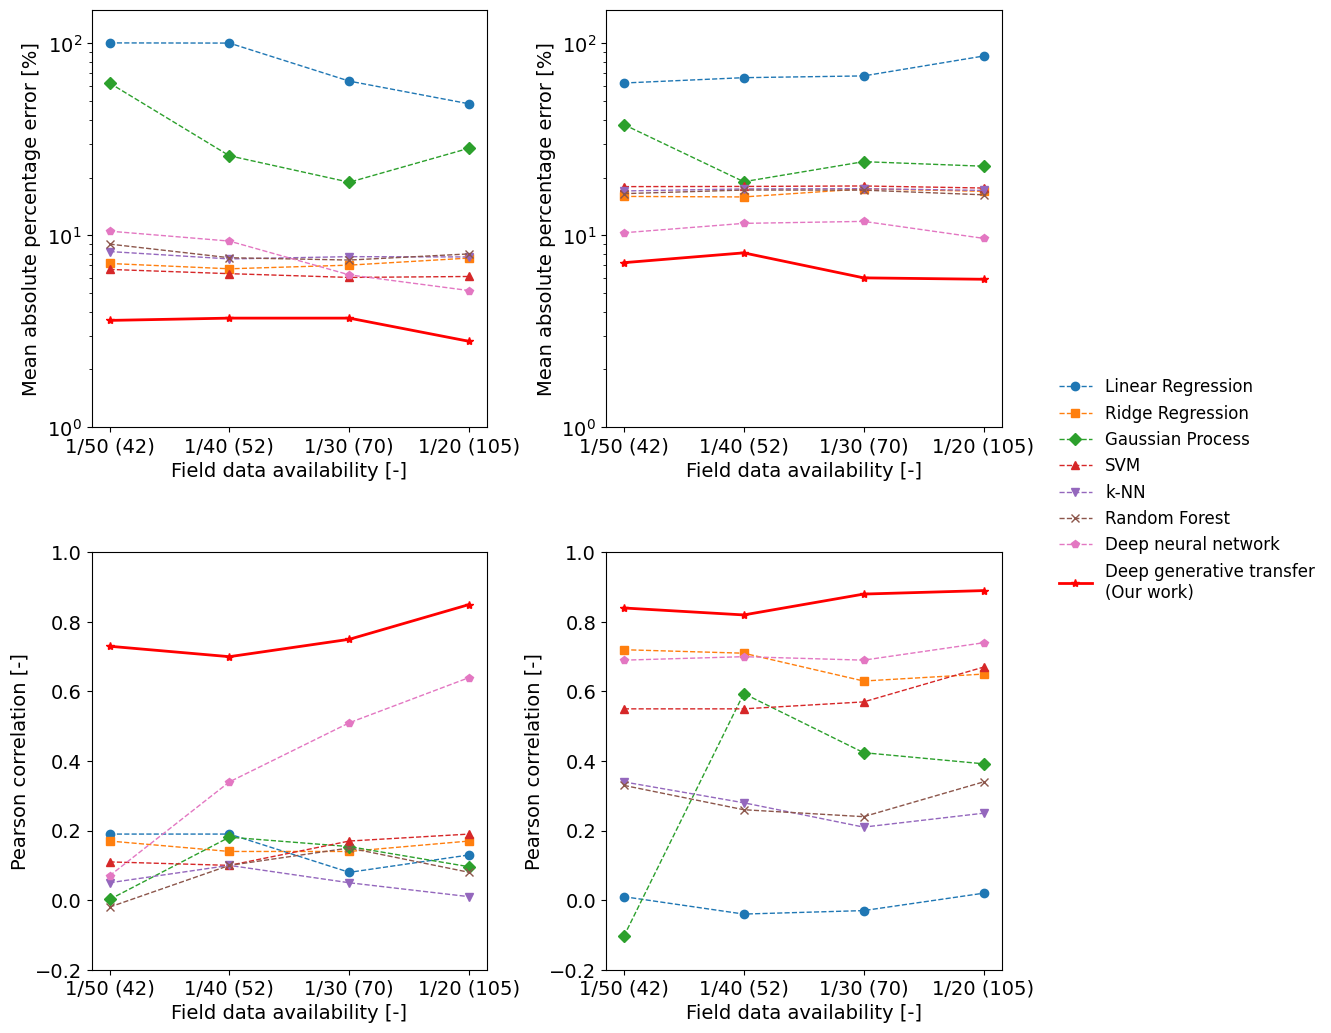

In [7]:
# 调用函数生成2x2布局的折线图，使用对数刻度
plot_2by2_line_chart_log_scale()